**Цель работы:**
 изучение основных способов визуализации табличных данных с помощью модулей seaborn, plotly, altair, bokeh.

**Краткое описание:**
 в лабораторной работе представлено 10 заданий на построение графиков разных видов. В каждом задании указано, каким видом графика стоит воспользоваться для визуализации данных. По каждому заданию необходимо построить график дважды: первый раз с помощью модуля seaborn (альтернативно можно matplotlib со стилями из seaborn), второй – с помощью plotly, altair или bokeh на выбор студента. Необязательно каждый раз для второго графика выбирать одну и ту же библиотеку, т.к. не все библиотеки располагают одинаковым набором графиков.



##### **Формат данных**
Представлена таблица с информацией о песнях, исполненных на Евровидении с 2009 по 2023 год. Все задания лабораторной работы будут выполняться по этим данным.

```
year,country,artist_name,song_name,language,style,gender,main_singers,key,BPM,energy,danceability,happiness,loudness,acousticness,instrumentalness,liveness,speechiness,final_place
2023,Norway,Alessandra,Queen of Kings,English,Pop,Female,1,E Minor,110,36,64,23,10 dB,58,0,10,3,5
2023,Malta,The Busker,Dance (Our Own Party),English,Pop,Male,1,F Minor,103,78,70,82,6 dB,2,0,18,4,
...
```
##### **Описание полей**

- ```year``` – год;
- ```country``` – страна участника;
- ```artist_name``` – исполнитель;
- ```song_name``` – название песни;
- ```language``` – язык, на котором исполняется песня;
- ```style```	– жанр;
- ```gender``` – пол участника;
- ```main_singers``` – количество вокалистов;
- ```key```	– регистр (высота тона);
- ```BPM``` – скорость композиции в целом (количество четвертых нот в минуту);
- ```energy``` – энергичность композиции;
- ```danceability``` – танцевальность (насколько трек подходит для танцев);
- ```happiness``` – жизнерадостность;
- ```loudness``` – громкость;
- ```acousticness``` – акустичность;
- ```instrumentalness``` – инструментальность;
- ```liveness``` – живость;
- ```speechiness``` – насколько много текста;
- ```final_place``` – место в финале.

In [1]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import seaborn as sns
import pycountry
import plotly.graph_objects as go
import matplotlib.colors as mcolors

In [3]:
path = "song_data.csv"

df = pd.read_csv(path, encoding="utf-8", on_bad_lines="skip")

print(df)


     year         country               artist_name                 song_name  \
0    2023          Norway                Alessandra            Queen of Kings   
1    2023           Malta                The Busker     Dance (Our Own Party)   
2    2023          Serbia                Luke Black          Samo mi se spava   
3    2023          Latvia             Sudden Lights                      Aija   
4    2023        Portugal                   Mimicat                Ai coraçăo   
..    ...             ...                       ...                       ...   
560  2009          France             Patricia Kaas  Et s'il fallait le faire   
561  2009          Russia      Anastasiya Prikhodko                      Mamo   
562  2009         Germany  Alex Swings Oscar Sings!       Miss Kiss Kiss Bang   
563  2009  United Kingdom                 Jade Ewen              It's My Time   
564  2009           Spain            Soraya Arnelas       La noche es para mi   

               language   s

## Задание 1

Проведите предобработку числовых значений в датасете:
1. В столбцах `BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness` замените отсутствующие значения и прочерки на 0.
2. В столбце `loudness` оставьте только число без единиц измерения.
3. Во всех перечисленных в пунктах 1 и 2 столбцах преобразуйте значения в тип данных `float`.

In [4]:

# Столбцы с числовыми значениями
columns_to_clean = [
    'BPM', 'energy', 'danceability', 'happiness',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness'
]

df[columns_to_clean] = df[columns_to_clean].replace('-', 0).fillna(0)

for col in columns_to_clean:
    df[col] = df[col].astype(float)

df['loudness'] = df['loudness'].replace('-', 0)
df['loudness'] = df['loudness'].str.extract(r'(-?\d+\.?\d*)')
df['loudness'] = df['loudness'].fillna(0).astype(float)

print(df[columns_to_clean + ['loudness']].dtypes)
print(df[columns_to_clean + ['loudness']].head())

BPM                 float64
energy              float64
danceability        float64
happiness           float64
acousticness        float64
instrumentalness    float64
liveness            float64
speechiness         float64
loudness            float64
dtype: object
     BPM  energy  danceability  happiness  acousticness  instrumentalness  \
0  110.0    36.0          64.0       23.0          58.0               0.0   
1  103.0    78.0          70.0       82.0           2.0               0.0   
2  103.0    70.0          56.0       11.0           4.0               2.0   
3  160.0    55.0          56.0       40.0           5.0               0.0   
4  145.0    63.0          66.0       77.0          31.0               0.0   

   liveness  speechiness  loudness  
0      10.0          3.0      10.0  
1      18.0          4.0       6.0  
2      32.0          5.0      10.0  
3       8.0          7.0       8.0  
4      16.0          5.0       8.0  


Предобработка числовых столбцов прошла успешно. Численные столбцы преобразовались в формат float64, а по первым 5 строкам можно понять, что нулевые значения тоже переформатированы в нормальный вид

## Задание 2

Покажите, какие характеристики музыки (`BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness`) коррелируют между собой. Для визуализации используйте диаграмму `heatmap`.

In [5]:
# Вычисляем корреляционную матрицу
corr_matrix = df[columns_to_clean].corr()


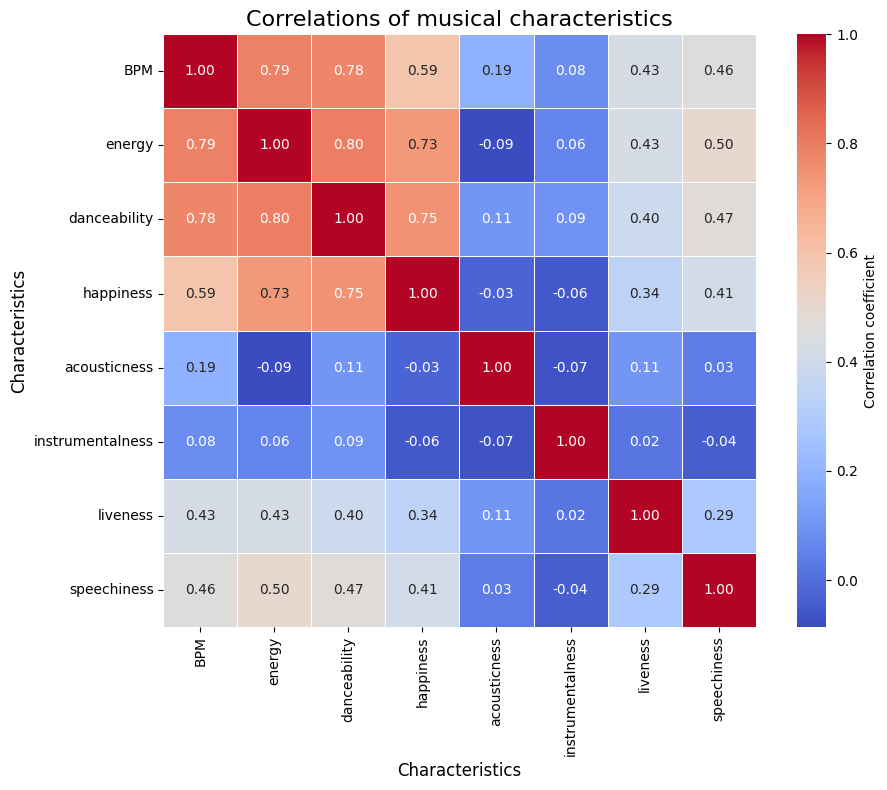

In [6]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"label": "Correlation coefficient"}
)

plt.title('Correlations of musical characteristics', fontsize=16)
plt.xlabel('Characteristics', fontsize=12)
plt.ylabel('Characteristics', fontsize=12)

plt.tight_layout()
plt.show()


* В датасете наблюдается сильная взаимосвязь между характеристиками, описывающими ритм и настроение (BPM, energy, danceability, happiness).

* Такие признаки, как instrumentalness и acousticness, слабо коррелируют с остальными — они скорее представляют отдельное измерение (например, акустичность не равно энергия).

* speechiness умеренно коррелирует с ритмическими признаками, что может отражать присутствие речитатива или вокала в быстрых треках.

## Задание 3

Покажите на диаграмме разброса взаимосвязь между жизнерадостностью (`happiness`) и энергичностью (`energy`) композиции. Добавьте на диаграмму вспомогательные элементы (отметку средних значений, выбросов) для упрощения интерпретации визуализации.



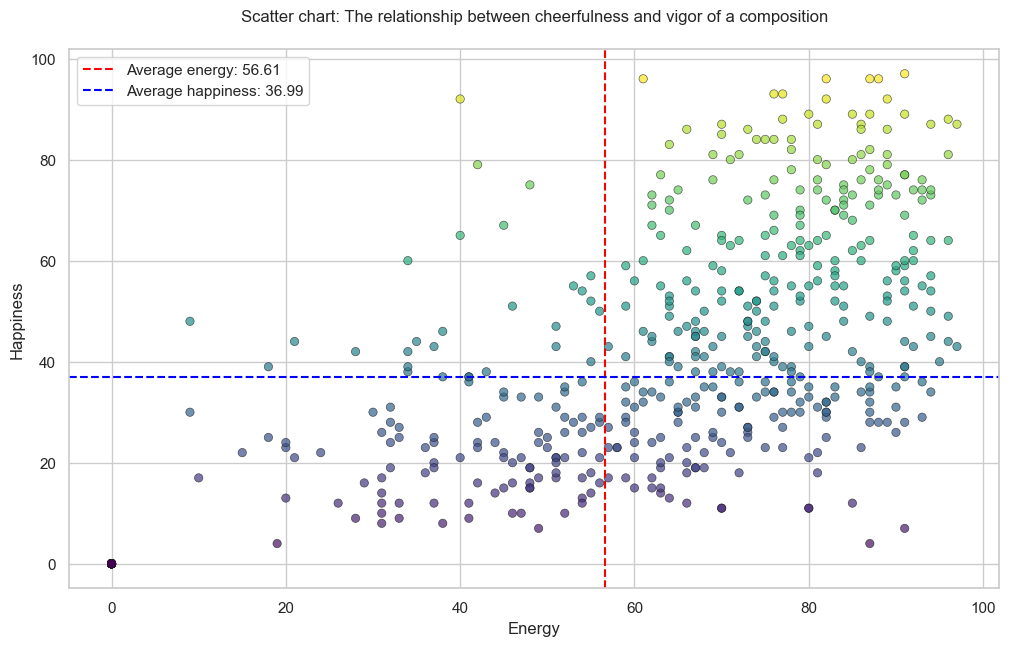

In [7]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))

scatter = sns.scatterplot(
    data=df,
    x='energy',
    y='happiness',
    hue='happiness',
    palette='viridis',
    alpha=0.7,
    edgecolor='k',
    legend=False )

# Добавление средних линий
mean_energy = df['energy'].mean()
mean_happiness = df['happiness'].mean()

plt.axvline(mean_energy, color='red', linestyle='--', label=f'Average energy: {mean_energy:.2f}')
plt.axhline(mean_happiness, color='blue', linestyle='--', label=f'Average happiness: {mean_happiness:.2f}')

# Выделение выбросов
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

outliers = detect_outliers(df['energy']) | detect_outliers(df['happiness'])

if outliers.any():
    outlier_data = df[outliers]
    sns.scatterplot(
        data=outlier_data,
        x='energy',
        y='happiness',
        color='black',
        s=100,
        label='Выбросы',
        edgecolor='red'
    )

plt.title('Scatter chart: The relationship between cheerfulness and vigor of a composition', pad=20)
plt.xlabel('Energy')
plt.ylabel('Happiness')
plt.legend()

plt.show()


Средняя энергичность: 56.61

Средняя жизнерадостность: 36.99

* Большинство точек сосредоточено в правом нижнем и правом верхнем квадрантах, что указывает на преобладание высокоэнергичных композиций.

* Однако жизнерадостность при этом сильно варьируется — от очень низкой до высокой.

* Отчетливой линейной зависимости между happiness и energy не наблюдается так как много разброса и присутвуют выбросы, но положительная зависимость прослеживается.

* Есть некоторые выбросы: например, композиции с нулевыми значениями счастья, при этом с разным уровнем энергии (некоторые из них отмечены как квадратные маркеры).

## Задание 4

Покажите на горизонтальной столбчатой диаграмме распределение количества треков по жанрам. Отсортируйте диаграмму по убыванию количества композиций в жанре. Выделите контрастным цветом жанр, в котором больше всего песен.

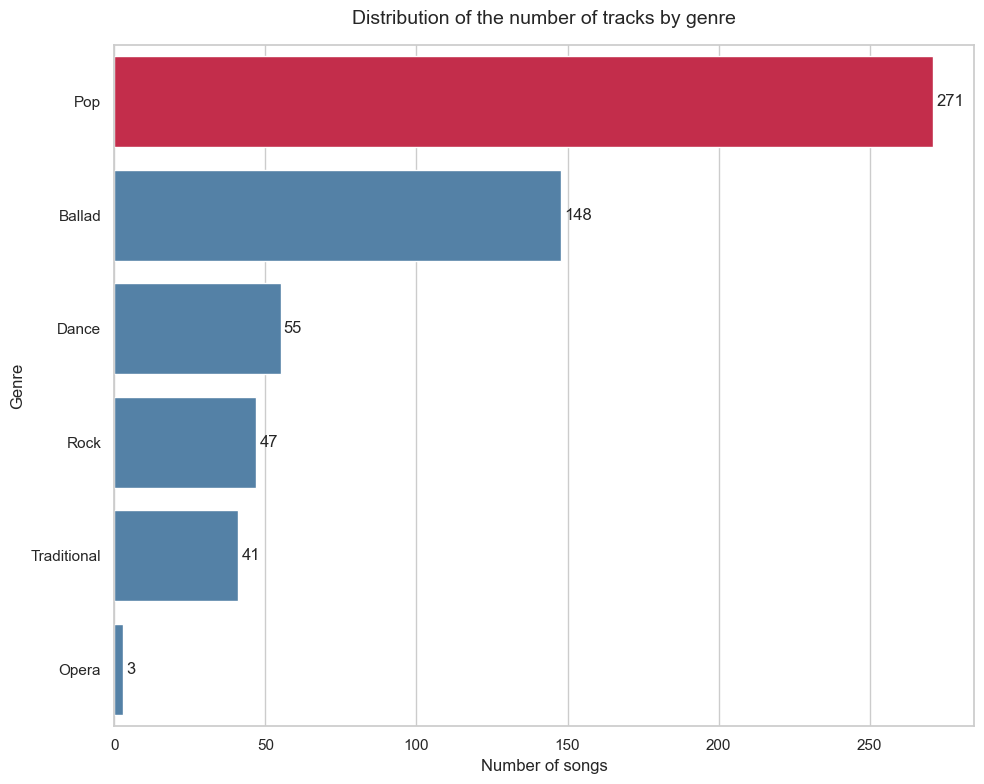

In [8]:
genre_counts = df['style'].value_counts()

# Определим жанр с наибольшим числом треков
top_genre = genre_counts.idxmax()

colors = ['crimson' if genre == top_genre else 'steelblue' for genre in genre_counts.index]

plt.figure(figsize=(10, 8))
sns.barplot(
    x=genre_counts.values,
    y=genre_counts.index,
    hue=genre_counts.index,
    dodge=False,
    palette=colors,
    legend=False
)
plt.title('Distribution of the number of tracks by genre', fontsize=14, pad=15)
plt.xlabel('Number of songs')
plt.ylabel('Genre')

for i, value in enumerate(genre_counts.values):
    plt.text(value + 1, i, str(value), va='center')

plt.tight_layout()
plt.show()


Исходя из результатов, в датасете рекордсмен среди жанров поп, а самый редкий жанр - опера. Результаты ожидаемы.

## Задание 5

Покажите на круговой диаграмме страны, участники из которых побеждали чаще других, и в каких годах они выигрывали. Диаграмма должна быть одна.

In [9]:
winners = df[df['final_place'] == 1].groupby('country')['year'].agg(['count', lambda x: ', '.join(map(str, sorted(x)))])
winners.columns = ['wins', 'years']
winners = winners.reset_index()

winners_sorted = winners.sort_values('wins', ascending=False)

# Получаем палитру YlOrBr из seaborn и преобразуем в HEX-коды
palette = sns.color_palette("YlOrBr", n_colors=len(winners_sorted))
colors = [mcolors.rgb2hex(color) for color in palette]

fig = go.Figure(go.Pie(
    labels=winners_sorted['country'],
    values=winners_sorted['wins'],
    marker=dict(colors=colors),
    hole=0.3,
    textinfo='label+percent',
    textposition='inside',
    hoverinfo='label+value+percent',
    customdata=winners_sorted['years'],
    hovertemplate='<b>%{label}</b><br>Побед: %{value}<br>Годы: %{customdata}<extra></extra>',
    direction='counterclockwise',
    sort=False
))

fig.update_layout(
    title=dict(
        text='The winning countries and the years of their victories',
        x=0.5,
        xanchor='center',
        font=dict(size=24)
    ),
    showlegend=False,
    margin=dict(t=80, b=20, l=20, r=20),
    height=700,
    annotations=[dict(
        text=f"Total wins: {winners['wins'].sum()}",
        x=0.5, y=0.5,
        font_size=16,
        showarrow=False
    )]
)

fig.show()

Лидером оказалась **Швеция** с тремя победами. Второе место заняла Украина с двумя победами, остальные 9 стран выгрывали по разу.

## Задание 6

На вертикальной столбчатой диаграмме с группировкой покажите количество мужчин и женщин среди участников в каждом году, представленном в датасете.

In [10]:
gender_year_counts = df.groupby(['year', 'gender']).size().reset_index(name='count')

fig = px.bar(
    gender_year_counts,
    x='year',
    y='count',
    color='gender',
    barmode='group',
    labels={'count': 'Number of paryicipants', 'year': 'Year', 'gender': 'Gender'},
    title='Number of men and women among the participants by year'
)

fig.update_layout(
    xaxis=dict(type='category'),
    title=dict(x=0.5, font=dict(size=22)),
    bargap=0.2,
    height=600
)

fig.show()


Можно заметить, что с 2009 года превалировало количество женщин и только ближе к настоящему времени колиечество участников мужского пола стало "догонять" женщин и в 2022 и 2023 превысило количество женщин.

## Задание 7

Постройте график плотности распределения данных в столбце `danceability` (танцевальность), сгруппированных по категориям жанрам.

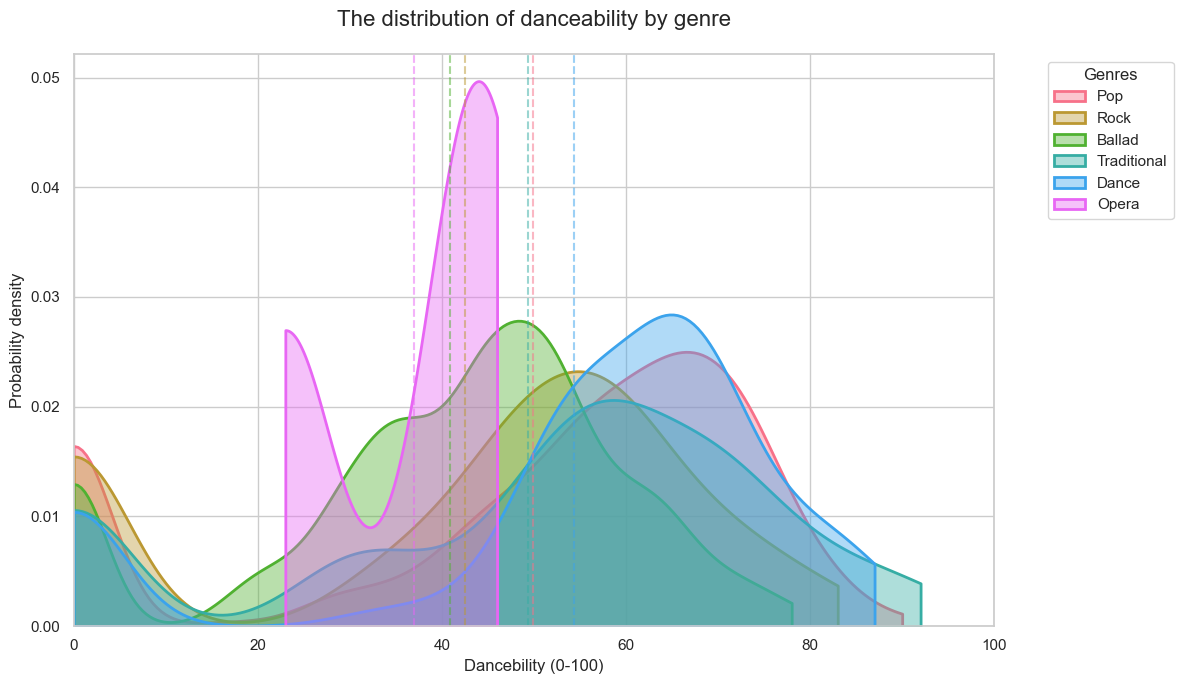

In [11]:
# Фильтрация данных
df_clean = df[(df['danceability'] >= 0) & (df['danceability'] <= 100)]

genres = df_clean['style'].unique()

palette = sns.color_palette("husl", len(genres))

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

for i, genre in enumerate(genres):
    sns.kdeplot(
        data=df_clean[df_clean['style'] == genre],
        x='danceability',
        label=genre,
        fill=True,
        alpha=0.4,
        linewidth=2,
        bw_adjust=0.5,
        cut=0,
        color=palette[i]
    )

plt.xlim(0, 100)
plt.ylim(0, None)

for i, genre in enumerate(genres):
    mean_val = df_clean[df_clean['style'] == genre]['danceability'].mean()
    plt.axvline(mean_val, color=palette[i], linestyle='--', alpha=0.5)

plt.title('The distribution of danceability by genre', fontsize=16, pad=20)
plt.xlabel('Dancebility (0-100)', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.legend(
    title='Genres',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

**Явные лидеры по танцевальности:**

Dance и Pop демонстрируют самый высокий пик плотности в диапазоне 60-80, что соответствует ожиданиям — эти жанры специально создаются для танцев.

Opera имеет низкие значения (20-40), что логично, так как она не ориентирована на танцевальность.

**Распределение по жанрам:**

Rock и Ballad занимают среднее положение (40-60), отражая их универсальность — некоторые композиции могут быть танцевальными, другие нет.

Traditional показывает самый широкий разброс, что может указывать на разнообразие поджанров в этой категории.


## Задание 8

Покажите на ящиковой диаграмме взяимосвязь позиции в финальном рейтинге со страной. Итоги каких стран похожи между собой?

In [12]:
# Получение порядка стран по медиане места
country_order = df.groupby('country')['final_place'].median().sort_values()
ordered_countries = country_order.index.tolist()

fig = go.Figure()

for country in ordered_countries:
    subset = df[df['country'] == country]

    fig.add_trace(go.Box(
        y=subset['final_place'],
        name=country,
        marker_color='royalblue',
        line_color='navy',
        boxmean=False,
        boxpoints=False,
        orientation='v',
        width=0.6,
        hoverinfo='y+name'
    ))

fig.update_layout(
    title='Distribution of final places by country',
    xaxis=dict(
        title='Country',
        tickangle=90,
        title_standoff=10,
        tickfont=dict(size=10)
    ),
    yaxis=dict(
        title='Final place',
        autorange='reversed',
        title_standoff=10
    ),
    height=700,
    width=1600,
    plot_bgcolor='white',
    showlegend=False
)

fig.show()


1. Лучшие страны (стабильно высокие результаты)
Страны с низким медианным значением (ящик расположен внизу графика):

Турция, Швеция, Украина, Италия, Россия

Узкий ящик → стабильно высокие результаты (часто попадают в топ-10)

Мало выбросов → редко оказываются внизу таблицы

2. Средние страны (непредсказуемые результаты)
Страны с широким ящиком (большой разброс мест):

Франция, Испания, Великобритания, Германия

Иногда попадают в топ-5, иногда проваливаются → нестабильность

Возможные причины:

Жюри/зрители оценивают по-разному

Частая смена музыкальных стилей

3. Худшие страны (проблемные результаты)
Страны с высоким медианным значением (ящик вверху графика):

Португалия, Грузия, Сан-Марино

Широкий ящик → результаты варьируются, но чаще внизу

Много выбросов → редкие удачные выступления

## Задание 9

Покажите на карте количество раз, когда каждая страна датасета проходила в финал.

In [13]:
# Список стран-участниц Евровидения (актуальные + исторические)
eurovision_countries = [
    'Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
    'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
    'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland',
    'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania',
    'Malta', 'Moldova', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia',
    'San Marino', 'Serbia', 'Slovenia', 'Spain', 'Sweden',
    'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'
]

def prepare_data(df):
    # Фильтруем только страны Евровидения
    df = df[df['country'].isin(eurovision_countries)]

    # Считаем количество финалов
    df_finals = df.dropna(subset=['final_place'])
    country_counts = df_finals['country'].value_counts().reset_index()
    country_counts.columns = ['country', 'final_participations']

    return country_counts

# Создание карты с фокусом на Евразию
def create_map(data):
    fig = px.choropleth(
        data,
        locations="country",
        locationmode="country names",
        color="final_participations",
        hover_name="country",
        hover_data=["final_participations"],
        projection="natural earth",
        color_continuous_scale=px.colors.sequential.Plasma,
        title="The number of hits in the Eurovision final",
        scope="world"
    )

    # Настраиваем область просмотра (Европа + Ближний Восток + Кавказ + Австралия)
    fig.update_geos(
        visible=False,
        center=dict(lon=35, lat=50),
        projection_scale=2.3,
        lataxis_range=[30, 70],
        lonaxis_range=[-20, 60]
    )

    fig.update_layout(
        margin=dict(l=0, r=0, t=40, b=0),
        coloraxis_colorbar=dict(title="Final's number")
    )

    return fig

# Запуск
country_data = prepare_data(df)
map_fig = create_map(country_data)
map_fig.show()

Можно заметить, что ни одна из старн южной и северной Америки и Африки не попадала в финал. А тот кусочек, что дислоцируется на севере южной Америики, принадлежит Франции.

## Задание 10

Покажите на диаграмме вида `treemap`, сколько раз каждая страна входила в топ-3 победителей.

*В `seaborn` нет такого типа графика, с помощью этого модуля строить график не нужно.*

In [14]:
import pandas as pd
import plotly.express as px

def prepare_data(df):
    # Фильтруем только топ-3 места
    df_top3 = df[df['final_place'].isin([1, 2, 3])]
    # Считаем количество попаданий для каждой страны
    return df_top3['country'].value_counts().reset_index(name='top3_count')

def create_treemap(data):
    fig = px.treemap(
        data,
        path=['country'],
        values='top3_count',
        color='top3_count',
        color_continuous_scale='Greys',
        title='<b>number of hits in the top 3 of Eurovision</b>',
        labels={'top3_count': 'Number of times'}
    )

    fig.update_traces(
        textinfo="label+value",
        texttemplate="<b>%{label}</b><br>%{value} раз",
        hovertemplate="<b>%{label}</b><br>Топ-3: %{value} раз"
    )

    fig.update_layout(
        margin=dict(t=50, l=10, r=10, b=10),
        height=600
    )

    return fig

top3_data = prepare_data(df)
fig = create_treemap(top3_data)
fig.show()

Можно заметить, что тройка лидеров финалистов не сильно отличается от тройки лидеров призеров, но все таки тут первое место занимает Швеция, а не Турция. На это еще влияет факт неучастия Турции с 2012 года